In [ ]:
%pip install --upgrade torch torchvision baseten

In [1]:
from slashml import ModelDeployment
import time

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from torchvision import datasets, transforms
import torch.nn.functional as F

In [2]:
class MNISTNet(nn.Module):
    def __init__(self):
        super(MNISTNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

In [3]:
def train(model, device, train_loader, optimizer, epoch, log_interval=10):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print(
                "Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(
                    epoch,
                    batch_idx * len(data),
                    len(train_loader.dataset),
                    100.0 * batch_idx / len(train_loader),
                    loss.item(),
                )
            )

In [4]:
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(
                output, target, reduction="sum"
            ).item()  # sum up batch loss
            pred = output.argmax(
                dim=1, keepdim=True
            )  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print(
        "\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n".format(
            test_loss,
            correct,
            len(test_loader.dataset),
            100.0 * correct / len(test_loader.dataset),
        )
    )

In [5]:
def train_model():
    device = "cpu"
    epochs = 1
    train_kwargs = {"batch_size": 64}
    test_kwargs = {"batch_size": 1000}
    transform = transforms.Compose(
        [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]
    )
    dataset1 = datasets.MNIST("../data", train=True, download=True, transform=transform)
    dataset2 = datasets.MNIST("../data", train=False, transform=transform)
    train_loader = torch.utils.data.DataLoader(dataset1, **train_kwargs)
    test_loader = torch.utils.data.DataLoader(dataset2, **test_kwargs)
    model = MNISTNet().to(device)
    optimizer = optim.Adadelta(model.parameters(), lr=1.0)

    scheduler = StepLR(optimizer, step_size=1, gamma=0.7)
    for epoch in range(1, epochs + 1):
        train(model, device, train_loader, optimizer, epoch)
        test(model, device, test_loader)
        scheduler.step()
    return model

In [6]:
# Model training

import torch
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from torchvision import datasets, transforms
import torch.nn.functional as F

model_py_string = """
import torch
import torch.nn as nn
import torch.nn.functional as F

class MNISTNet(nn.Module):
    def __init__(self):
        super(MNISTNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output
"""

with open('model.py', 'w') as model_py_file:
    model_py_file.write(model_py_string)








In [7]:
my_model = train_model()


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.284733
Train Epoch: 1 [640/60000 (1%)]	Loss: 1.395781
Train Epoch: 1 [1280/60000 (2%)]	Loss: 0.770145
Train Epoch: 1 [1920/60000 (3%)]	Loss: 0.569007
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.407825
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.322430
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.279010
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.210277
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.367257
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.286512
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.258308
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.176819
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.174119
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.127595
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.177771
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.153454
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.388022
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.152137
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.378497
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.227217
Train Epoch: 1 [12800/60000 (

In [8]:

# Replace `API_KEY` with your SlasML API token.
client = ModelDeployment(api_key="68b50f46b97f8c0f98fe419df240a22af3da392f")


In [9]:
# deploy model
response = client.deploy(model_name='pytorch-model', model=my_model)


> /Users/faizank/workspace/experiments/live_projects/slashml/sdk_tests/venv-3.9.1/lib/python3.9/site-packages/truss/model_frameworks/pytorch.py(61)_torch_package()
     59         import pdb
     60         pdb.set_trace()
---> 61         exp.save_pickle(TORCH_MODEL_PACKAGE_NAME, TORCH_MODEL_PICKLE_FILENAME, model)
     62 
     63 



ipdb>  c


/Users/faizank/workspace/experiments/live_projects/slashml/sdk_tests/venv-3.9.1/lib/python3.9/site-packages/torch/package/package_exporter.py:925: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  storage_type_str = obj.pickle_storage_type()


> /Users/faizank/workspace/experiments/live_projects/slashml/sdk_tests/venv-3.9.1/lib/python3.9/site-packages/torch/package/package_exporter.py(1090)close()
   1088         import pdb
   1089         pdb.set_trace()
-> 1090         self._execute_dependency_graph()
   1091         self._write_python_version()
   1092 



ipdb>  c


> /Users/faizank/workspace/experiments/live_projects/slashml/sdk_tests/venv-3.9.1/lib/python3.9/site-packages/truss/model_frameworks/pytorch.py(31)serialize_model_to_directory()
     29             import pdb
     30             pdb.set_trace()
---> 31             _torch_package(
     32                 model, target_directory / TORCH_PACKAGE_FILE, modules_to_extern
     33             )



ipdb>  c


> /Users/faizank/workspace/experiments/live_projects/slashml/sdk_tests/venv-3.9.1/lib/python3.9/site-packages/truss/model_frameworks/pytorch.py(61)_torch_package()
     59         import pdb
     60         pdb.set_trace()
---> 61         exp.save_pickle(TORCH_MODEL_PACKAGE_NAME, TORCH_MODEL_PICKLE_FILENAME, model)
     62 
     63 



ipdb>  c


> /Users/faizank/workspace/experiments/live_projects/slashml/sdk_tests/venv-3.9.1/lib/python3.9/site-packages/torch/package/package_exporter.py(1090)close()
   1088         import pdb
   1089         pdb.set_trace()
-> 1090         self._execute_dependency_graph()
   1091         self._write_python_version()
   1092 



ipdb>  c


PackagingError: 
* Module had no __file__ defined.
    __main__
      A path to __main__: <torch_model.model.pkl> -> __main__

In [13]:
client.status(model_version_id=response.id)

{'id': '9b2ec8cb-729a-417e-a39a-ffab8b14cec0',
 'created': '2023-09-19T21:38:44.989348Z',
 'status': 'READY',
 'name': 'pytorch-model'}

In [14]:
status = client.status(model_version_id=response.id)

while status.status != 'READY':
    print(f'status: {status.status}')
    print('trying again in 5 seconds')
    time.sleep(5)
    status = client.status(model_version_id=response.id)

    if status.status == 'FAILED':
        raise Exception('Model deployment failed')

print('model ready')

model ready


In [16]:
# submit prediction
transform = transforms.Compose(
        [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]
    )
inputs = datasets.MNIST("../data", train=False, transform=transform)
dataset = torch.utils.data.DataLoader(inputs, batch_size=1)


In [19]:
import numpy as np

model_input = np.array(next(iter(dataset))[0])

model_input

array([[[[-0.42421296, -0.42421296, -0.42421296, -0.42421296,
          -0.42421296, -0.42421296, -0.42421296, -0.42421296,
          -0.42421296, -0.42421296, -0.42421296, -0.42421296,
          -0.42421296, -0.42421296, -0.42421296, -0.42421296,
          -0.42421296, -0.42421296, -0.42421296, -0.42421296,
          -0.42421296, -0.42421296, -0.42421296, -0.42421296,
          -0.42421296, -0.42421296, -0.42421296, -0.42421296],
         [-0.42421296, -0.42421296, -0.42421296, -0.42421296,
          -0.42421296, -0.42421296, -0.42421296, -0.42421296,
          -0.42421296, -0.42421296, -0.42421296, -0.42421296,
          -0.42421296, -0.42421296, -0.42421296, -0.42421296,
          -0.42421296, -0.42421296, -0.42421296, -0.42421296,
          -0.42421296, -0.42421296, -0.42421296, -0.42421296,
          -0.42421296, -0.42421296, -0.42421296, -0.42421296],
         [-0.42421296, -0.42421296, -0.42421296, -0.42421296,
          -0.42421296, -0.42421296, -0.42421296, -0.42421296,
      

In [79]:
prediction = client.predict(model_version_id=response.id, model_input=model_input.tolist())

print(prediction)

{'id': '9b2ec8cb-729a-417e-a39a-ffab8b14cec0', 'model_input': [[[[-0.4242129623889923, -0.4242129623889923, -0.4242129623889923, -0.4242129623889923, -0.4242129623889923, -0.4242129623889923, -0.4242129623889923, -0.4242129623889923, -0.4242129623889923, -0.4242129623889923, -0.4242129623889923, -0.4242129623889923, -0.4242129623889923, -0.4242129623889923, -0.4242129623889923, -0.4242129623889923, -0.4242129623889923, -0.4242129623889923, -0.4242129623889923, -0.4242129623889923, -0.4242129623889923, -0.4242129623889923, -0.4242129623889923, -0.4242129623889923, -0.4242129623889923, -0.4242129623889923, -0.4242129623889923, -0.4242129623889923], [-0.4242129623889923, -0.4242129623889923, -0.4242129623889923, -0.4242129623889923, -0.4242129623889923, -0.4242129623889923, -0.4242129623889923, -0.4242129623889923, -0.4242129623889923, -0.4242129623889923, -0.4242129623889923, -0.4242129623889923, -0.4242129623889923, -0.4242129623889923, -0.4242129623889923, -0.4242129623889923, -0.42421

In [123]:
prediction = client.predict(model_version_id=response.id, model_input=next_dataset[0])

print(prediction['model_response'])

TypeError: Object of type Tensor is not JSON serializable

In [35]:
# Function to show an image
def imshow(img):
    img = img * 0.3081 + 0.1307  # Inverse normalization
    img = img.squeeze()  # Remove the batch dimension (1 in this case)
    plt.imshow(img, cmap='gray')
    plt.show()

In [37]:
import matplotlib.pyplot as plt


In [50]:
len(dataset)

10000

In [120]:
next_dataset = [x for x in dataset][2]

In [110]:
model_input = np.array(next_dataset[0])

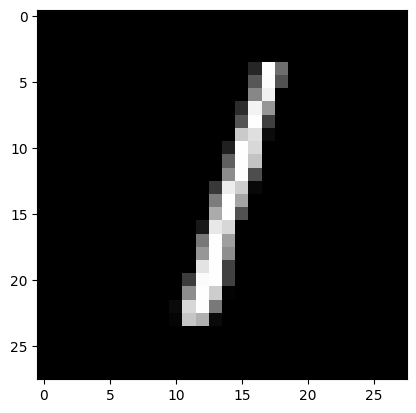

In [121]:
imshow(next_dataset[0])

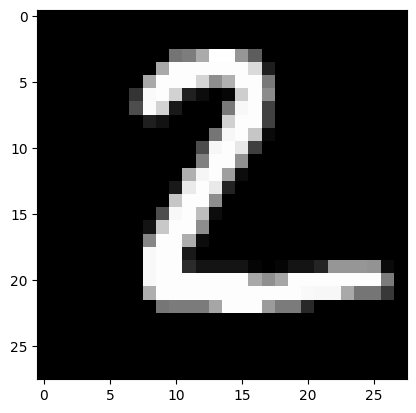

TypeError: Invalid shape () for image data

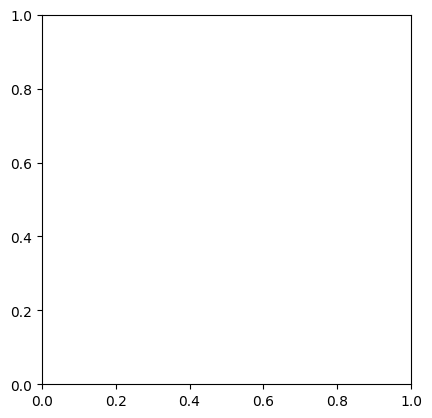

In [108]:
# Iterate through the DataLoader and display a few images
for i, (image) in enumerate(next_dataset):
    # print(f"Label: {label.item()}")
    imshow(image)
    # if i >= 1:  # Display the first 5 images
    #     break

In [112]:
scores = prediction['model_response']['predictions']
scores

[[-10.468087196350098,
  -8.480340957641602,
  -0.0003480305604171008,
  -9.298460006713867,
  -14.817855834960938,
  -15.037297248840332,
  -11.12935733795166,
  -14.010838508605957,
  -12.3683443069458,
  -16.299909591674805]]

In [118]:
abs(max(scores[0]))

0.0003480305604171008

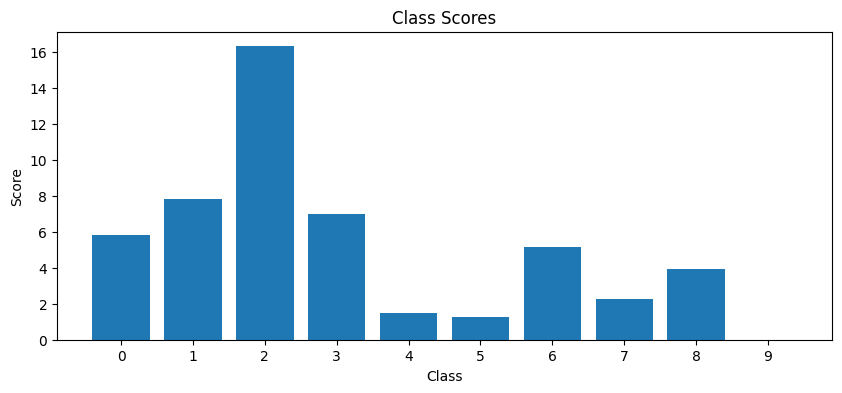

In [119]:
# Convert the scores to a 1D NumPy array
scores = np.array(scores)

# # Create a bar chart or heatmap for the scores
fig, ax = plt.subplots(figsize=(10, 4))

# If you have multiple sets of scores (e.g., for multiple data points), you can use imshow
# ax.imshow(scores, cmap='viridis', aspect='auto', extent=(0, len(scores[0]), 0, len(scores)))

# If you have a single set of scores (like in your example), you can use bar
ax.bar(range(len(scores[0])), [x+ abs(min(scores[0])) for x in scores[0]], tick_label=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ax.set_xlabel("Class")
ax.set_ylabel("Score")
ax.set_title("Class Scores")

plt.show()

In [46]:

# If you have multiple sets of scores (e.g., for multiple data points), you can use imshow
# ax.imshow(scores, cmap='viridis', aspect='auto', extent=(0, len(scores[0]), 0, len(scores)))

# If you have a single set of scores (like in your example), you can use bar
ax.bar(range(len(scores[0])), scores[0], tick_label=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ax.set_xlabel("Class")
ax.set_ylabel("Score")
ax.set_title("Class Scores")

plt.show()